Import Library

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

Membaca dataset

In [2]:
data = pd.read_csv('/content/Tagged-Data-Final.csv')
data

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,x,NaN,x
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,x,NaN,x
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,x,NaN,x
3,[Prototype],2009.0,Action,Activision,0.84,0.35,0.00,0.12,1.31,78.0,83.0,7.8,356.0,Radical Entertainment,M,NaN,x,x
4,[Prototype],2009.0,Action,Activision,0.65,0.40,0.00,0.19,1.24,79.0,53.0,7.7,308.0,Radical Entertainment,M,NaN,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Zubo,2008.0,Misc,Electronic Arts,0.08,0.02,0.00,0.01,0.11,75.0,19.0,7.6,75.0,EA Bright Light,E10+,NaN,x,NaN
6890,Zumba Fitness,2010.0,Sports,505 Games,1.74,0.45,0.00,0.18,2.37,42.0,10.0,5.5,16.0,"Pipeworks Software, Inc.",E,NaN,x,NaN
6891,Zumba Fitness: World Party,2013.0,Misc,Majesco Entertainment,0.17,0.05,0.00,0.02,0.24,73.0,5.0,6.2,40.0,Zoe Mode,E,NaN,x,NaN
6892,Zumba Fitness Core,2012.0,Misc,505 Games,0.00,0.05,0.00,0.00,0.05,77.0,6.0,6.7,6.0,Zoe Mode,E10+,NaN,x,NaN


Univariate Exploratory Data Analysis

Mengetahui apa saja genre game yang ada

In [3]:
print('Banyak tipe genre: ', len(data.Genre.unique()))
print('Genre Game : ', data.Genre.unique())

Banyak tipe genre:  12
Genre Game :  ['Role-Playing' 'Action' 'Racing' 'Misc' 'Adventure' 'Simulation' 'Sports'
 'Shooter' 'Puzzle' 'Platform' 'Strategy' 'Fighting']


mengecek persebaran distribusi genre

              jumlah sampel  persentase
Action                 1644        23.8
Sports                  951        13.8
Shooter                 868        12.6
Role-Playing            715        10.4
Racing                  586         8.5
Platform                403         5.8
Misc                    386         5.6
Fighting                379         5.5
Simulation              302         4.4
Strategy                278         4.0
Adventure               264         3.8
Puzzle                  118         1.7


Text(0.5, 0, 'Gambar 1. Distribusi kategori genre')

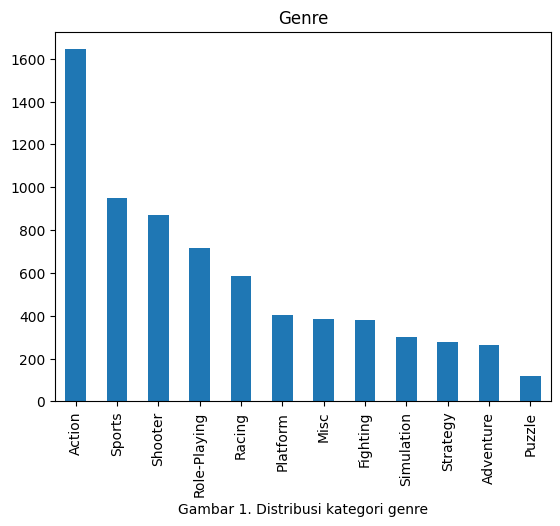

In [4]:
feature = 'Genre'
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
plt.xlabel("Gambar 1. Distribusi kategori genre")


Mengetahui siapa saja Publisher game yang ada

In [5]:
print('Banyak tipe publisher: ', len(data.Publisher.unique()))
print('Publisher Game : ', data.Publisher.unique())

Banyak tipe publisher:  272
Publisher Game :  ['Atari' 'Activision' 'Electronic Arts' 'Nintendo' 'DTP Entertainment'
 'Deep Silver' 'Ubisoft' 'Acclaim Entertainment' 'DSI Games'
 'Sony Computer Entertainment' 'Eidos Interactive'
 'Warner Bros. Interactive Entertainment' 'SouthPeak Games'
 'Gathering of Developers' 'THQ' 'Vivendi Games' 'Telltale Games' 'Sega'
 'Funsta' 'Majesco Entertainment' 'MTV Games' 'Capcom'
 'Namco Bandai Games' 'Sony Computer Entertainment Europe' 'Mamba Games'
 'Focus Home Interactive' 'Little Orbit' 'Idea Factory' 'PQube' 'Unknown'
 'The Adventure Company' 'JoWood Productions' 'Microids' 'Funcom'
 'Microsoft Game Studios' 'Playlogic Game Factory' 'bitComposer Games'
 'Konami Digital Entertainment' 'Kalypso Media' 'Nordic Games'
 'Disney Interactive Studios' 'Zoo Digital Publishing' 'O3 Entertainment'
 'Fox Interactive' 'Take-Two Interactive' 'Psygnosis'
 'Brash Entertainment' 'Codemasters' 'Mud Duck Productions' 'Mastertronic'
 'Avanquest' 'Lexicon Entertainme

Mengetahui persebaran distribusi publisher

                             jumlah sampel  persentase
Electronic Arts                        945        13.7
Ubisoft                                498         7.2
Activision                             492         7.1
Sony Computer Entertainment            316         4.6
THQ                                    307         4.5
...                                    ...         ...
Groove Games                             1         0.0
Sunflowers                               1         0.0
Paradox Development                      1         0.0
Monte Christo Multimedia                 1         0.0
Nihon Falcom Corporation                 1         0.0

[271 rows x 2 columns]


Text(0.5, 0, 'Gambar 2. Distribusi kategori publisher')

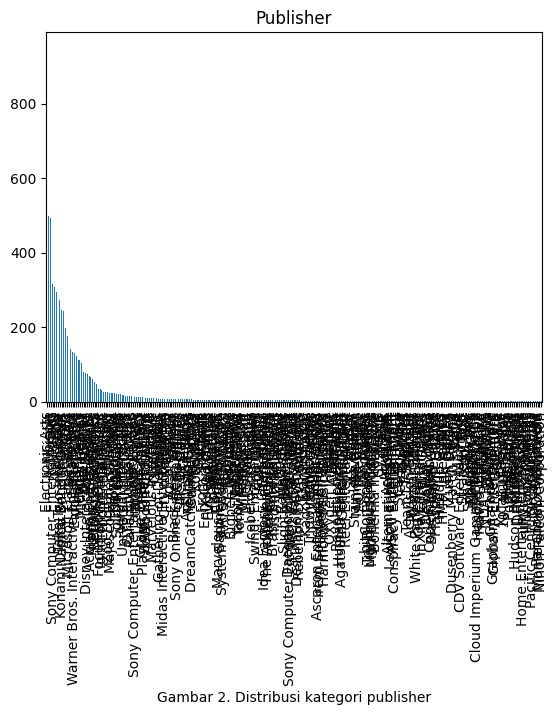

In [6]:
feature = 'Publisher'
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
plt.xlabel("Gambar 2. Distribusi kategori publisher")

Mengetahui persebaran distribusi developer

                  jumlah sampel  persentase
EA Canada                   149         2.2
EA Sports                   142         2.1
Capcom                      126         1.8
Ubisoft                     103         1.5
Konami                       97         1.4
...                         ...         ...
Opus Studio                   1         0.0
Gusto Games                   1         0.0
ThatGameCompany               1         0.0
Tate Interactive              1         0.0
Blue Fang Games               1         0.0

[1304 rows x 2 columns]


Text(0.5, 0, 'Gambar 3. Distribusi kategori developer')

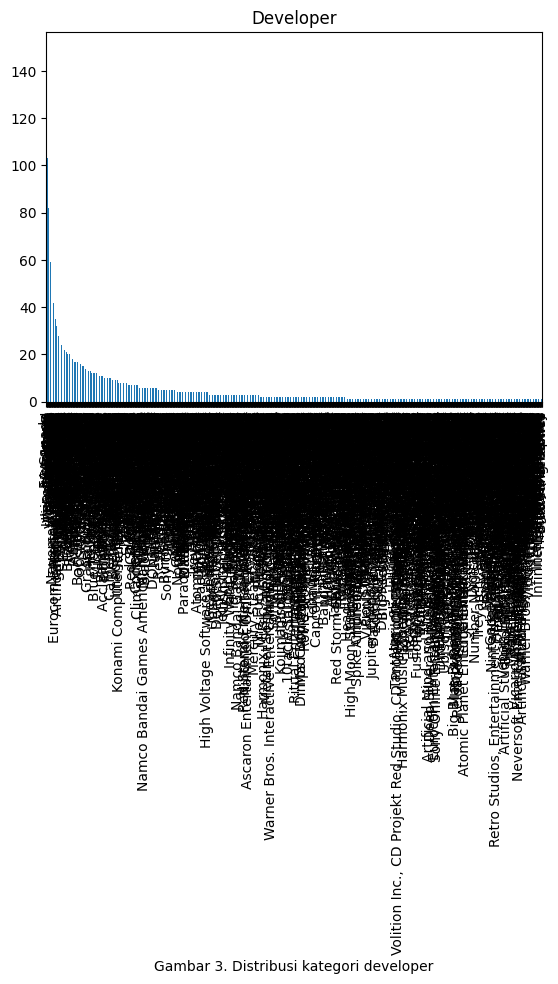

In [7]:
feature = 'Developer'
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
plt.xlabel("Gambar 3. Distribusi kategori developer")

Mengetahui siapa saja Developer game yang ada

In [8]:
print('Banyak Developer: ', len(data.Developer.unique()))
print('Developer: ', data.Developer.unique())

Banyak Developer:  1305
Developer:  ['CyberConnect2' 'Radical Entertainment' 'Treyarch' ... 'PuzzleKings'
 'Buddiez, Inc.' 'Blue Fang Games']


Mengetahui apa saja tipe rating game yang ada

In [9]:
print('Banyaknya Rating: ', len(data.Rating.unique()))
print('Tipe Rating: ', data.Rating.unique())

Banyaknya Rating:  8
Tipe Rating:  ['T' 'M' nan 'E10+' 'E' 'AO' 'K-A' 'RP']


Mengetahui persebaran distribusi rating

      jumlah sampel  persentase
T              2378        34.8
E              2082        30.5
M              1433        21.0
E10+            930        13.6
AO                1         0.0
K-A               1         0.0
RP                1         0.0


Text(0.5, 0, 'Gambar 4. Distribusi kategori rating')

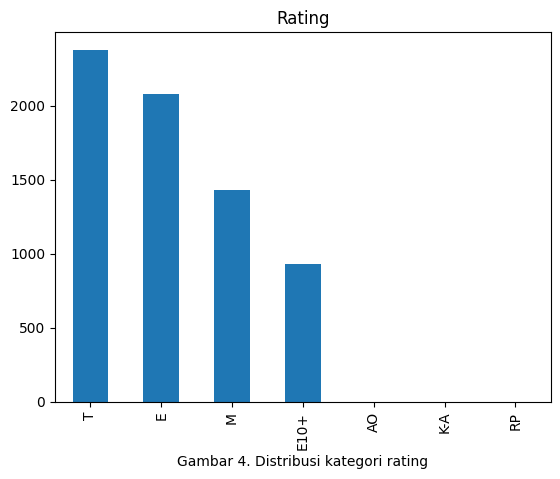

In [10]:
feature = 'Rating'
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
plt.xlabel("Gambar 4. Distribusi kategori rating")

Menghapus kolom Story Focus, Gameplay focus, Series

In [ ]:
data.drop('Story Focus', axis=1, inplace=True)
data.drop('Gameplay Focus', axis=1, inplace=True)
data.drop('Series', axis=1, inplace=True)

Mengecek apakah ada missing value

In [ ]:
data.isnull().sum()

Name                0
Year_of_Release     0
Genre               0
Publisher           1
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score        0
Critic_Count        0
User_Score          0
User_Count          0
Developer           4
Rating             68
dtype: int64

Menghapus Missing Value

In [ ]:
data_clean = data.dropna()
data_clean

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T
3,[Prototype],2009.0,Action,Activision,0.84,0.35,0.00,0.12,1.31,78.0,83.0,7.8,356.0,Radical Entertainment,M
4,[Prototype],2009.0,Action,Activision,0.65,0.40,0.00,0.19,1.24,79.0,53.0,7.7,308.0,Radical Entertainment,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Zubo,2008.0,Misc,Electronic Arts,0.08,0.02,0.00,0.01,0.11,75.0,19.0,7.6,75.0,EA Bright Light,E10+
6890,Zumba Fitness,2010.0,Sports,505 Games,1.74,0.45,0.00,0.18,2.37,42.0,10.0,5.5,16.0,"Pipeworks Software, Inc.",E
6891,Zumba Fitness: World Party,2013.0,Misc,Majesco Entertainment,0.17,0.05,0.00,0.02,0.24,73.0,5.0,6.2,40.0,Zoe Mode,E
6892,Zumba Fitness Core,2012.0,Misc,505 Games,0.00,0.05,0.00,0.00,0.05,77.0,6.0,6.7,6.0,Zoe Mode,E10+


Memastikan kembali apakah masih terdapat missing value atau tidak

In [ ]:
data_clean.isnull().sum()

Name               0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Menganti Rating K-A menjadi E

In [ ]:
data_clean = data_clean.replace('K-A', 'E')

Membuat variabel bernama preparation

In [ ]:
preparation = data_clean
preparation

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T
3,[Prototype],2009.0,Action,Activision,0.84,0.35,0.00,0.12,1.31,78.0,83.0,7.8,356.0,Radical Entertainment,M
4,[Prototype],2009.0,Action,Activision,0.65,0.40,0.00,0.19,1.24,79.0,53.0,7.7,308.0,Radical Entertainment,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Zubo,2008.0,Misc,Electronic Arts,0.08,0.02,0.00,0.01,0.11,75.0,19.0,7.6,75.0,EA Bright Light,E10+
6890,Zumba Fitness,2010.0,Sports,505 Games,1.74,0.45,0.00,0.18,2.37,42.0,10.0,5.5,16.0,"Pipeworks Software, Inc.",E
6891,Zumba Fitness: World Party,2013.0,Misc,Majesco Entertainment,0.17,0.05,0.00,0.02,0.24,73.0,5.0,6.2,40.0,Zoe Mode,E
6892,Zumba Fitness Core,2012.0,Misc,505 Games,0.00,0.05,0.00,0.00,0.05,77.0,6.0,6.7,6.0,Zoe Mode,E10+


Mengonversi data series menjadi list

In [ ]:
# Mengonversi data series ‘Name’ menjadi dalam bentuk list
game_name = preparation['Name'].tolist()

# Mengonversi data series ‘Genre’ menjadi dalam bentuk list
game_genre = preparation['Genre'].tolist()

print(len(game_name))
print(len(game_genre))

6825
6825


Membuat dictionary untuk data ‘game_name’, dan ‘game_genre’

In [ ]:
game_new = pd.DataFrame({
    'game_name': game_name,
    'genre': game_genre
})
game_new

,game_name,genre
0,.hack//Infection Part 1,Role-Playing
1,.hack//Mutation Part 2,Role-Playing
2,.hack//Outbreak Part 3,Role-Playing
3,[Prototype],Action
4,[Prototype],Action
...,...,...
6820,Zubo,Misc
6821,Zumba Fitness,Sports
6822,Zumba Fitness: World Party,Misc
6823,Zumba Fitness Core,Misc


menemukan representasi fitur penting dari setiap kategori genre.

In [ ]:
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(game_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'playing',
       'puzzle', 'racing', 'role', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

 melakukan fit dan transformasi ke dalam bentuk matriks

In [ ]:
tfidf_matrix = tf.fit_transform(game_new['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(6825, 13)

menghasilkan vektor tf-idf dalam bentuk matriks

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

 melihat matriks tf-idf untuk beberapa game (game_name) dan kategori genre (genre)

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=game_new.game_name
).sample(13, axis=1).sample(10, axis=0)

,sports,fighting,action,shooter,platform,puzzle,role,adventure,simulation,strategy,misc,racing,playing
game_name,,,,,,,,,,,,,
The Hobbit,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
The SpongeBob SquarePants Movie,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
Custom Robo Arena,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
Naruto Shippuden: Ultimate Ninja Storm 2,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
Secret Weapons Over Normandy,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000
Samurai Warriors: Katana,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
Rayman Legends,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
Odin Sphere: Leifthrasir,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.707107
Sonic and the Secret Rings,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


Menghitung cosine similarity pada matrix tf-idf

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

melihat matriks kesamaan setiap game dengan menampilkan nama game

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=game_new['game_name'], columns=game_new['game_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap game
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6825, 6825)


game_name,Onimusha 3: Demon Siege,Super Monkey Ball Adventure,Mega Man X Collection,NBA Jam,Viking: Battle for Asgard
game_name,,,,,
Toukiden: The Age of Demons,1.0,0.0,0.0,0.0,1.0
Resident Evil: Outbreak,1.0,0.0,0.0,0.0,1.0
NBA Jam,0.0,0.0,0.0,1.0,0.0
Hamtaro: Ham-Ham Games,0.0,0.0,0.0,1.0,0.0
[Prototype 2],1.0,0.0,0.0,0.0,1.0
IL-2 Sturmovik: Birds of Prey,0.0,0.0,0.0,0.0,0.0
Tomb Raider: Legend,1.0,0.0,0.0,0.0,1.0
Romance of the Three Kingdoms IX,0.0,0.0,0.0,0.0,0.0
NHL 09,0.0,0.0,0.0,1.0,0.0


Membuat fungsi rekomendasi

In [ ]:
def game_recommendations(nama_game, similarity_data=cosine_sim_df, items=game_new[['game_name', 'genre']], k=5):
    index = similarity_data.loc[:, nama_game].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_game, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

mengecek genre dari game yang ingin di coba dicari rekomendasinya

In [ ]:
game_new[game_new.game_name.eq('Airblade')]

,game_name,genre
90,Airblade,Sports


mencoba fungsi rekomendasi

In [ ]:
game_recommendations('Airblade')

,game_name,genre
0,Zumba Fitness Rush,Sports
1,NCAA Football 10,Sports
2,NCAA Football 10,Sports
3,NCAA Football 12,Sports
4,NCAA Football 12,Sports
